In [5]:
import cv2
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer , OneHotEncoder , OrdinalEncoder , MinMaxScaler , StandardScaler
import numpy as np 
from tensorflow.keras import layers , models
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.layers import BatchNormalization, Dropout

In [6]:
X_train = []
y_train = []

In [7]:
LB = LabelBinarizer()

In [8]:
for item in glob.glob("E:\\00Code\\Dataset\\Gender2\\train\\*\\*"):
    image = cv2.imread(item)
    resize_img = cv2.resize(image, (64,64))
    normalize_img = resize_img / 255.0
    flatten_img = normalize_img.flatten()
    X_train.append(flatten_img)
    y = item.split("\\")[-1].split("-")[0]
    y_train.append(y)

In [10]:
unique_items = set(y_train)  
print(unique_items)

{'Male', 'Female'}


In [11]:
X_test = []
y_test = []

In [12]:
for item in glob.glob("E:\\00Code\\Dataset\\Gender2\\test\\*\\*"):
    image = cv2.imread(item)
    resize_img = cv2.resize(image, (64,64))
    normalize_img = resize_img / 255.0
    flatten_img = normalize_img.flatten()
    X_test.append(flatten_img)
    y = item.split("\\")[-1].split("-")[0]
    y_test.append(y)

In [13]:
# X_train , X_test , y_train , y_test =train_test_split(datas , labels ,test_size=0.2, random_state=101 , shuffle=True)

In [14]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [15]:
print(X_train.shape)
print(X_test.shape)

(6564, 12288)
(1000, 12288)


In [16]:
y_train = LB.fit_transform(y_train)
y_test = LB.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
scaler = StandardScaler()

In [18]:
scaled_x_train = scaler.fit_transform(X_train) 
scaled_x_test = scaler.transform(X_test)

In [19]:
# Network = models.Sequential([
#     layers.Dense(10, activation = "relu", input_shape = (scaled_x_train.shape[1],)),
#     layers.Dense(8, activation = "relu",activity_regularizer=L2(0.001)),
#     layers.Dense(2, activation = "sigmoid")
# ])

In [48]:
Network = models.Sequential([
    layers.Dense(128, activation = "relu", input_shape = (12288,)),
    layers.Dense(64 , activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(2 , activation="sigmoid")
])

In [49]:
Network.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,581,634 (6.03 MB)

 Trainable params: 1,581,506 (6.03 MB)

 Non-trainable params: 128 (512.00 B)

In [50]:
Network.compile(optimizer="Adam", 
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [51]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
History = Network.fit(X_train, y_train, epochs=30, batch_size=64, verbose=2, validation_data=(X_test , y_test), callbacks=[reduce_lr])

Epoch 1/30
103/103 - 2s - 19ms/step - accuracy: 0.7745 - loss: 0.4996 - val_accuracy: 0.8370 - val_loss: 0.3902 - learning_rate: 0.0010
Epoch 2/30
103/103 - 1s - 10ms/step - accuracy: 0.8752 - loss: 0.3260 - val_accuracy: 0.8840 - val_loss: 0.2751 - learning_rate: 0.0010
Epoch 3/30
103/103 - 1s - 6ms/step - accuracy: 0.8967 - loss: 0.2652 - val_accuracy: 0.8690 - val_loss: 0.3088 - learning_rate: 0.0010
Epoch 4/30
103/103 - 1s - 7ms/step - accuracy: 0.9170 - loss: 0.2206 - val_accuracy: 0.8710 - val_loss: 0.3202 - learning_rate: 0.0010
Epoch 5/30
103/103 - 1s - 6ms/step - accuracy: 0.9246 - loss: 0.1906 - val_accuracy: 0.8370 - val_loss: 0.4212 - learning_rate: 0.0010
Epoch 6/30
103/103 - 1s - 6ms/step - accuracy: 0.9479 - loss: 0.1461 - val_accuracy: 0.9270 - val_loss: 0.1924 - learning_rate: 2.0000e-04
Epoch 7/30
103/103 - 1s - 7ms/step - accuracy: 0.9523 - loss: 0.1328 - val_accuracy: 0.9250 - val_loss: 0.1936 - learning_rate: 2.0000e-04
Epoch 8/30
103/103 - 1s - 7ms/step - accuracy

In [ ]:
# History = Network.fit(scaled_x_train, y_train, epochs=20, verbose=2, validation_split=0.2, batch_size = 10)

In [ ]:
# History = Network.fit(X_train , y_train , batch_size = 32 ,  epochs=20, verbose=2, validation_data = (X_test , y_test)) 

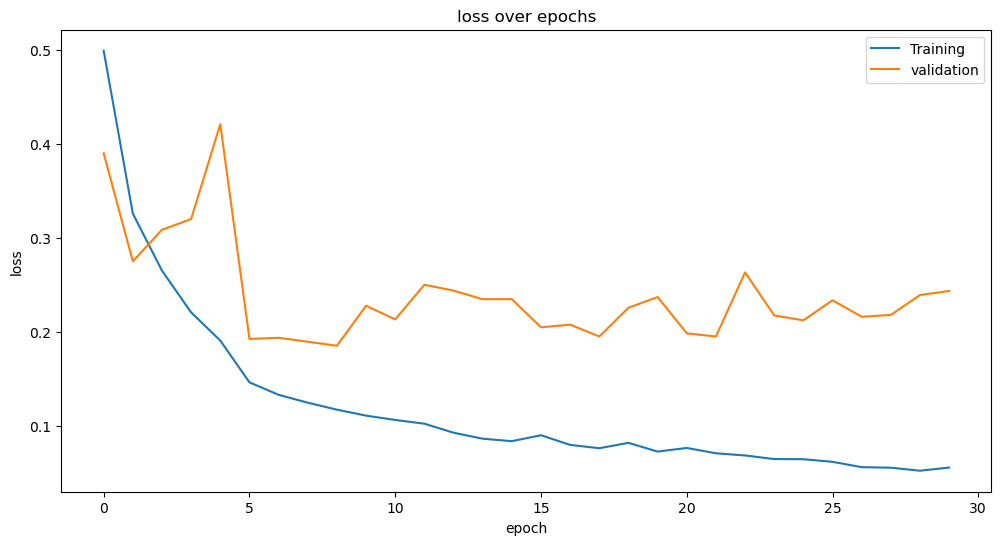

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
#plt.subplots(1,2,1)
plt.plot(History.history["loss"], label = "Training")
plt.plot(History.history["val_loss"], label = "validation")
plt.title("loss over epochs")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [53]:
Network.save("Gender.h5")